In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install wbdata

import wbdata

  Using cached wbdata-0.3.0-py3-none-any.whl (14 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)


In [4]:
population = 40

indicators = wbdata.get_indicator(source=population)


In [5]:
age_ranges = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

print(age_ranges)

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [6]:
list_ma = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
list_fe = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}


In [11]:
xx= "MMR"
world_ma = wbdata.get_dataframe(list_ma, country=xx)
world_fe = wbdata.get_dataframe(list_fe, country=xx)

In [18]:
year= 2000
list_age = ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64",'65-69', '70-74', '75-79', '80-UP']
range_fe = world_fe.query("date=='2018'").sum(axis=0).tolist()
range_ma = world_ma.query("date=='2018'").sum(axis=0).tolist()
neg_range_ma = [ -x for x in range_ma]

dff = pd.DataFrame({'Age': list_age,
                 'Female': range_fe,
                 'Male': neg_range_ma})
dff

,Age,Female,Male
0,0-4,2238253.0,-2279429.0
1,5-9,2306619.0,-2335347.0
2,10-14,2491777.0,-2512010.0
3,15-19,2527385.0,-2527916.0
4,20-24,2363879.0,-2328549.0
5,25-29,2215921.0,-2138534.0
6,30-34,2099819.0,-2005335.0
7,35-39,2015704.0,-1910462.0
8,40-44,1935260.0,-1765580.0
9,45-49,1784828.0,-1576112.0


In [19]:
neg_range_ma = [ -x for x in range_ma]
print(neg_range_ma)

[-2279429.0, -2335347.0, -2512010.0, -2527916.0, -2328549.0, -2138534.0, -2005335.0, -1910462.0, -1765580.0, -1576112.0, -1332888.0, -1071273.0, -840605.0, -575824.0, -334399.0, -200870.0, -148072.0]


[Text(0.5, 0, 'Population (millions)'),
 Text(0, 0.5, 'Age-Group'),
 Text(0.5, 1.0, 'Population Pyramid')]

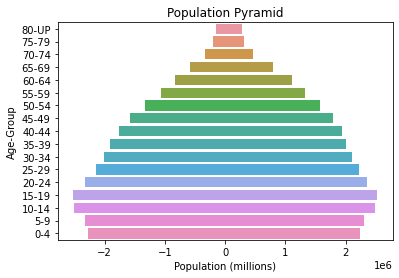

In [20]:
AgeClass = [ '80-UP', '75-79', '70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

bar_plot = sns.barplot(x='Female', y='Age', data=dff, order=AgeClass)

bar_plot = sns.barplot(x='Male', y='Age', data=dff, order=AgeClass)

bar_plot.set(xlabel="Population (millions)", ylabel="Age-Group", title = "Population Pyramid")